In [2]:
# clone git

In [3]:
!rm -rf ../data/external
!rm -rf ../nlp_utils_repo

In [4]:
!git clone https://github.com/OnlpLab/Hebrew-Sentiment-Data.git ../data/external/OnlpLab
!git clone https://github.com/wzwzeyal/nlp_utils_repo.git ./nlp_utils_repo

Cloning into '../data/external/OnlpLab'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 67 (delta 35), reused 27 (delta 15), pack-reused 0
Unpacking objects: 100% (67/67), 1.65 MiB | 2.35 MiB/s, done.
fatal: destination path './nlp_utils_repo' already exists and is not an empty directory.


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nlp_utils_repo.nlp_utils import clean_data, remove_words

from nltk.probability import FreqDist
from nltk import word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/eyalshw/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
ROOT_PATH = '../data/external/OnlpLab/Sentiment_Data'
FIG_SIZE = (20, 15)


In [7]:
def get_onlp_data(token_or_morph, data_type):
  return pd.read_csv(f'{ROOT_PATH}/{token_or_morph}/{data_type}.tsv', sep='\t')

In [8]:
train_token_df = get_onlp_data('token', 'train')
val_token_df = get_onlp_data('token', 'dev')

train_morph_df = get_onlp_data('morph', 'train')
val_morph_df = get_onlp_data('morph', 'dev')

In [9]:
datasets = [
  {"name": "train_token_df", "df": train_token_df},
  {"name": "val_token_df", "df": val_token_df},
  {"name": "train_morph_df", "df": train_morph_df},
  {"name": "val_morph_df", "df": val_morph_df},
]

In [10]:
codes = {0 : 'pos', 1: 'neg', 2: 'nut'}
palette = {'pos': 'green', 'neg': 'red', 'nut': 'gray'}


In [11]:
for dataset in datasets:
  df = dataset['df']
  clean_data(df, 'comment', 'comment_clean')
  df['sentiment'] = df.label.map(codes)
  df['comment_clean_len'] = df.comment_clean.str.len()

In [12]:
train_token_df.sample(5)

,comment,label,comment_clean,sentiment,comment_clean_len
3800,רובי אתה אח,0,רובי אתה אח,pos,11
4516,שמע קצת צר לי לבאס אבל היום ה29 ...,1,שמע קצת צר לי לבאס אבל היום,neg,27
335,רובי הנשיא עזוב אותך דיבורים .. היום מה עושים ...,1,רובי הנשיא עזוב אותך דיבורים היום מה עושים הבר...,neg,65
1789,"כל הכבוד לגעת ריבלין , רעייתו של ח'כ ריבלין א...",0,כל הכבוד לגעת ריבלין רעייתו של ח'כ ריבלין אשר ...,pos,428
3569,היא פשוט בוגדת בעצמה ( הכלה ) במשפחה בדם שלה ו...,1,היא פשוט בוגדת בעצמה הכלה במשפחה בדם שלה ובעיק...,neg,109


In [13]:
val_token_df.sample(5)

,comment,label,comment_clean,sentiment,comment_clean_len
358,יפה . הנשיא קורה מקור ראשון ...,0,יפה הנשיא קורה מקור ראשון,pos,25
462,צדקתי ..... וזה טוב לישראל ולעם .,0,צדקתי וזה טוב לישראל ולעם,pos,25
332,שבת שלום לנשיא,0,שבת שלום לנשיא,pos,14
71,איזה כיף להגיד שבת טובה לנשיאנו רובי ריבלין הי...,0,איזה כיף להגיד שבת טובה לנשיאנו רובי ריבלין הי...,pos,87
828,אם אתה כל כך מאמין בזה אזה תחוקקו חוק בכנסת שכ...,0,אם אתה כל כך מאמין בזה אזה תחוקקו חוק בכנסת שכ...,pos,193


In [14]:
train_morph_df.sample(5)

,comment,label,comment_clean,sentiment,comment_clean_len
178,מי נשיא ימני של ביתר ירושלים אכפת ל נשיא שמאלנ...,1,מי נשיא ימני של ביתר ירושלים אכפת נשיא שמאלני ...,neg,60
1051,מעניין ש כל פעם ש משהו ימני נאמר מיד זועקים ה...,1,מעניין כל פעם משהו ימני נאמר מיד זועקים הסתה א...,neg,1410
667,יהי זכרו ב ה רוך .,0,יהי זכרו רוך,pos,12
5471,ה כל דבורים ב ה שטח אין כלום,0,כל דבורים שטח אין כלום,pos,22
4120,אני מציע לתת ל כול ישוב ביהודה ו שומרון להקים ...,1,אני מציע לתת כול ישוב ביהודה שומרון להקים שלוש...,neg,135


In [15]:
val_morph_df.sample(5)

,comment,label,comment_clean,sentiment,comment_clean_len
122,קח מגרסה גרוס את כולם זרוק ל מזבלה,1,קח מגרסה גרוס את כולם זרוק מזבלה,neg,32
46,יא חתיכת מזדיין ב תחת נשיא מדינת ישראל מעניין ...,1,יא חתיכת מזדיין תחת נשיא מדינת ישראל מעניין אם...,neg,146
595,מר ריבלין - אתה מעודד נישואי תערובת ? לשם כך ...,1,מר ריבלין אתה מעודד נישואי תערובת לשם כך הקמנו...,neg,233
155,יישר כוח על תגובתך .,0,יישר כוח על תגובתך,pos,18
460,"ב ואו ל שולחנות עגולים ב רחבי ה ארץ , בואו ל ...",0,ואו שולחנות עגולים רחבי ארץ בואו מעגלי שיח דבר...,pos,212


In [16]:
datasets[0]['df']

,comment,label,comment_clean,sentiment,comment_clean_len
0,ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד...,0,ממש כואב אני בוכה עם המשפחה שלא תדעו עוד צער,pos,44
1,כל הכבוד והמון בהצלחה,0,כל הכבוד והמון בהצלחה,pos,21
2,"תל חי , רובי . בכל העצב הזה היית קרן אור של ת...",0,תל חי רובי בכל העצב הזה היית קרן אור של תקוה א...,pos,63
3,נקי כפיים ובר לבב בהצלחה לך ולנו .,0,נקי כפיים ובר לבב בהצלחה לך ולנו,pos,32
4,רובי חג שמח והצלחה בבחירות לנשיאות .,0,רובי חג שמח והצלחה בבחירות לנשיאות,pos,34
...,...,...,...,...,...
5921,כל הכבוד לנשיא שלנו !,0,כל הכבוד לנשיא שלנו,pos,19
5922,לשבעת המגייבים הקודמים : דמוקרטיה אין פירושה ...,1,לשבעת המגייבים הקודמים דמוקרטיה אין פירושה למח...,neg,386
5923,ישששששששששששששששש בשעה טובה איש מדהים איש אמת ...,0,ישש בשעה טובה איש מדהים איש אמת עם ישראל בשעתו...,pos,53
5924,יחי יחי נשיא מדינת ישראל רובי רבלין.אנא מימך א...,0,יחי יחי נשיא מדינת ישראל רובי רבליןאנא מימך אל...,pos,208


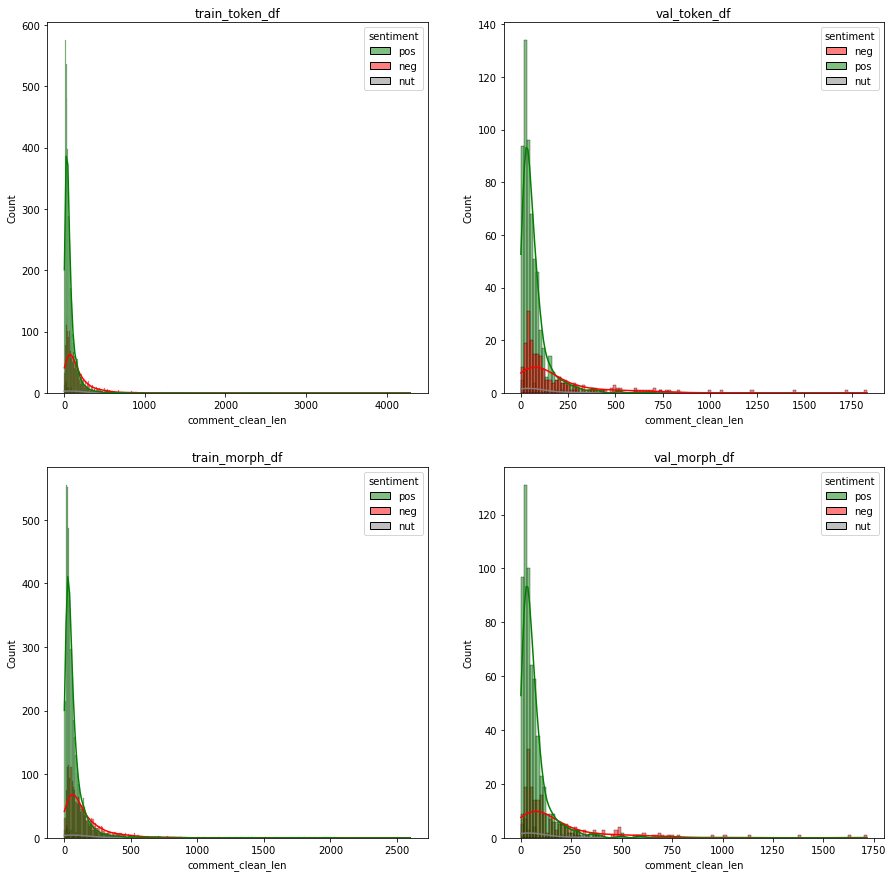

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))#, gridspec_kw={'hspace': 1.2, 'wspace': 1.5})

for ax, dataset in zip(axes.flatten(), datasets):
  sns.histplot(dataset['df'], x='comment_clean_len', hue='sentiment', palette=palette, ax=ax, kde=True)
  ax.set_title(dataset['name'])

plt.show()


#for ax in axs:


In [18]:
MAX_LEN=128

# for dataset in datasets:
#   df = dataset['df']
#   df = df[df.comment_clean_len < MAX_LEN]

for idx in range(len(datasets)):
  df = datasets[idx]['df']
  datasets[idx]['df'] = df[df.comment_clean_len < MAX_LEN]#  & df.comment_clean_len > 0]

for idx in range(len(datasets)):
  df = datasets[idx]['df']
  datasets[idx]['df'] = df[df.comment_clean_len > 0]#  & df.comment_clean_len > 0]

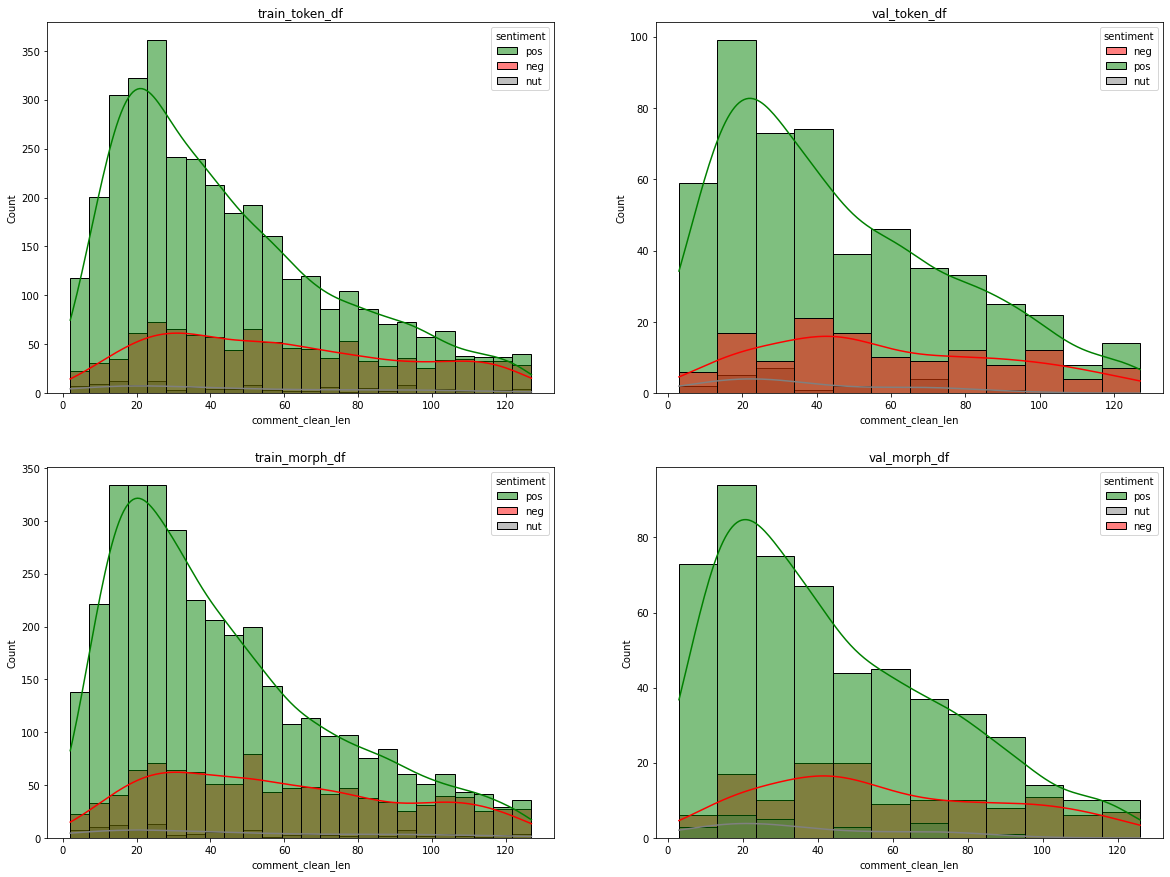

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=FIG_SIZE)

for ax, dataset in zip(axes.flatten(), datasets):
  df = dataset['df']
  sns.histplot(df, x='comment_clean_len', hue='sentiment', palette=palette, ax=ax, kde=True)
  ax.set_title(dataset['name'])

plt.show()

In [20]:
SENTIMENT_DATA = '../data/for_sentiment'

!mkdir SENTIMENT_DATA

for dataset in datasets:
  name = dataset['name']
  print(dataset['df'].describe())
  dataset['df'].to_csv(
      f'{SENTIMENT_DATA}/{name}.gz',
       compression = 'gzip')

mkdir: cannot create directory ‘SENTIMENT_DATA’: File exists
             label  comment_clean_len
count  4616.000000        4616.000000
mean      0.273830          47.957322
std       0.498726          31.104913
min       0.000000           2.000000
25%       0.000000          23.000000
50%       0.000000          40.000000
75%       0.000000          68.000000
max       2.000000         127.000000
            label  comment_clean_len
count  681.000000         681.000000
mean     0.258443          47.888399
std      0.506595          31.145378
min      0.000000           3.000000
25%      0.000000          22.000000
50%      0.000000          41.000000
75%      0.000000          69.000000
max      2.000000         127.000000
            label  comment_clean_len
count  4683.00000        4683.000000
mean      0.27461          46.937860
std       0.49922          30.897437
min       0.00000           2.000000
25%       0.00000          22.000000
50%       0.00000          39.000000
75%  

In [21]:
# collecting data for topic segmentation

In [76]:
TOPIC_DATA = '../data/for_topic'

In [22]:
!git clone https://github.com/gidim/HebrewStopWords.git

fatal: destination path 'HebrewStopWords' already exists and is not an empty directory.


In [23]:
stop_words = open('./HebrewStopWords/heb_stopwords.txt').read().splitlines()

In [85]:
def preprocess_for_topic(
    df,
    text_col='comment_clean',
    topic_col='topic',
    stop_words=stop_words,
    nof_most_common=10,
    max_freq=400,
    max_topic_len=256):

    df = df.copy()

    df[topic_col] = df[text_col].map(lambda x: remove_words(x, stop_words))
    word_freq = FreqDist(sum(df[topic_col].map(word_tokenize), [])).most_common(nof_most_common)
    words_to_extract = [word[0] for word in word_freq if word[1] > max_freq]  # 'words that repeats themselves over 500 times
    df[topic_col] = df[topic_col].map(lambda x: remove_words(x, words_to_extract))
    df['topic_len'] = df[topic_col].str.len()
    df = df[df['topic_len'] > 0]
    df = df[df['topic_len'] < max_topic_len]
    return df

In [86]:
all_tokens_df = pd.concat([train_token_df, val_token_df]).reset_index()
all_tokens_df = preprocess_for_topic(all_tokens_df)
all_tokens_df.to_csv(f'{TOPIC_DATA}/all_tokens_df.gz', compression='gzip')

In [87]:
all_tokens_df.describe()

,index,label,comment_clean_len,topic_len
count,6259.000000,6259.000000,6259.000000,6259.000000
mean,2643.026042,0.332641,78.599297,49.806998
std,1808.555062,0.526000,73.116268,49.799420
min,0.000000,0.000000,3.000000,2.000000
25%,848.500000,0.000000,28.000000,15.000000
50%,2542.000000,0.000000,53.000000,32.000000
75%,4218.500000,1.000000,103.000000,66.000000
max,5925.000000,2.000000,493.000000,255.000000


In [88]:
all_morphs_df = pd.concat([train_morph_df, val_morph_df]).reset_index()
all_morphs_df = preprocess_for_topic(all_morphs_df)
all_morphs_df.to_csv(f'{TOPIC_DATA}/all_morphs_df.gz', compression='gzip')

In [89]:
all_morphs_df.describe()

,index,label,comment_clean_len,topic_len
count,6276.000000,6276.000000,6276.000000,6276.000000
mean,2645.767208,0.340185,79.792543,44.410612
std,1809.434315,0.528202,78.137796,47.165456
min,0.000000,0.000000,3.000000,2.000000
25%,847.750000,0.000000,27.000000,12.750000
50%,2551.500000,0.000000,52.000000,27.000000
75%,4220.250000,1.000000,102.250000,57.000000
max,5931.000000,2.000000,559.000000,255.000000
